# Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df =pd.read_csv('../data/AdSmartABdata.csv')
df.sample(2)

auction_id experiment        date  hour  \
4815  998a44f1-c9b7-4f82-85d6-f91a4e5ee91d    control  2020-07-04     9   
1387  2d8a87c3-3550-443e-aa2b-dfc52ea31554    exposed  2020-07-10     7   

             device_make  platform_os        browser  yes  no  
4815  Generic Smartphone            6  Chrome Mobile    0   0  
1387  Generic Smartphone            6  Chrome Mobile    0   0

In [3]:
df.sort_values(by='experiment')

auction_id experiment        date  hour  \
4038  818f37f3-dae8-4a33-a22e-e54056e0ba7d    control  2020-07-03    15   
4521  902a058f-8a97-47d1-b260-9dc7011fd9fc    control  2020-07-09    13   
4519  9017d3c0-70cb-4e20-9316-86d54a941375    control  2020-07-10    15   
4517  8fff9d59-1927-4932-9ef6-04068646e0db    control  2020-07-05    14   
4504  8f78ea0d-da5a-43a5-b03a-41b623026007    control  2020-07-03    15   
...                                    ...        ...         ...   ...   
1673  37396986-4e16-4024-b448-b727d339377a    exposed  2020-07-08    15   
1674  373cba3b-61af-4574-8c52-dc2b2e7ad5bf    exposed  2020-07-04    11   
4755  9795c323-e96b-492c-b8b5-eb05de04a8c1    exposed  2020-07-09     6   
4764  9812db3b-2c00-472d-8d30-a0b06c813357    exposed  2020-07-10    15   
0     0008ef63-77a7-448b-bd1e-075f42c55e39    exposed  2020-07-10     8   

                device_make  platform_os                browser  yes  no  
4038      Samsung SM-A600FN            6  Chrome Mobile WebView    0   0  
4521       Samsung SM-G965F            6       Samsung Internet    0   0  
4519     Generic Smartphone            6          Chrome Mobile    0   0  
4517     Generic Smartphone            6          Chrome Mobile    0   0  
4504     Generic Smartphone            6          Chrome Mobile    0   0  
...                     ...          ...                    ...  ...  ..  
1673  OnePlus ONEPLUS A6013            6               Facebook    0   0  
1674     Generic Smartphone            6          Chrome Mobile    0   0  
4755     Generic Smartphone            6          Chrome Mobile    0   0  
4764       Samsung SM-G960F            6  Chrome Mobile WebView    0   0  
0        Generic Smartphone            6          Chrome Mobile    0   0  

[8077 rows x 9 columns]

In [4]:
print(f'Number of unquie users in the experiment: {df["auction_id"].nunique()}')
print(f'Percentage of users in control: {round(df[df["experiment"]=="control"].shape[0] * 100 / df.shape[0])} %')

Number of unquie users in the experiment: 8077
Percentage of users in control: 50 %


In [5]:
df.browser.unique()

array(['Chrome Mobile', 'Chrome Mobile WebView', 'Facebook',
       'Mobile Safari', 'Chrome Mobile iOS', 'Samsung Internet',
       'Mobile Safari UI/WKWebView', 'Chrome', 'Opera Mini',
       'Edge Mobile', 'Android', 'Pinterest', 'Opera Mobile',
       'Firefox Mobile', 'Puffin'], dtype=object)

In [6]:
df['experiment'].value_counts()

control    4071
exposed    4006
Name: experiment, dtype: int64

In [7]:
import datetime
df['day'] = df['date'].apply(lambda x: pd.to_datetime(x, format ="%Y-%m-%d").day_name())
df.sort_values(by='day').head(10)

auction_id experiment        date  hour  \
0     0008ef63-77a7-448b-bd1e-075f42c55e39    exposed  2020-07-10     8   
4002  8099b8b8-cddf-4a73-acf7-68b882199ac9    exposed  2020-07-10     6   
4004  80b8db90-c0cb-4c5d-977b-a8d0ea81f83e    control  2020-07-10    10   
4013  80fa4065-1e42-4f38-b8d4-9bbf46159b4c    exposed  2020-07-03    11   
4024  812d75df-6f5d-434e-9fbf-4790f9042a7c    control  2020-07-03    15   
4026  813d28f3-f7a8-4856-bcc9-edd53003ad6e    control  2020-07-03    15   
4028  8155078e-5658-4177-9bc5-404127e2d1b9    exposed  2020-07-10    13   
4041  81acdb19-8f95-43fd-bc20-c29956dc975c    control  2020-07-03    15   
4058  8243f244-97c1-4c90-9a4f-924c5737518a    control  2020-07-03    15   
4066  826d31e4-dddb-4188-90b5-13a6f34bea2c    exposed  2020-07-03     6   

             device_make  platform_os                browser  yes  no     day  
0     Generic Smartphone            6          Chrome Mobile    0   0  Friday  
4002  Generic Smartphone            6           Opera Mobile    0   0  Friday  
4004   Samsung SM-J320FN            6       Samsung Internet    0   0  Friday  
4013  Generic Smartphone            6          Chrome Mobile    0   0  Friday  
4024  Generic Smartphone            6          Chrome Mobile    0   0  Friday  
4026  Generic Smartphone            6          Chrome Mobile    0   0  Friday  
4028   Samsung SM-A300FU            6  Chrome Mobile WebView    0   1  Friday  
4041  Generic Smartphone            6          Chrome Mobile    0   0  Friday  
4058  Generic Smartphone            6          Chrome Mobile    0   0  Friday  
4066  Generic Smartphone            6          Chrome Mobile    0   0  Friday

# Univarate Analysis


In [8]:
def plot(df:pd.DataFrame, x_col:str, title:str,rotation=0):
    plt.figure(figsize=(12, 6))
    plt.title(title);
    plt.xticks(rotation=rotation)
    sns.countplot(data=df, x=x_col)
  
    plt.show()

In [22]:
# hour counts
df['hour'].value_counts()

15    1895
8      394
7      381
9      346
10     336
16     335
6      327
14     319
5      302
13     290
11     282
4      281
12     278
18     273
3      266
20     264
17     263
2      230
19     227
1      222
21     206
0      194
22     135
23      31
Name: hour, dtype: int64

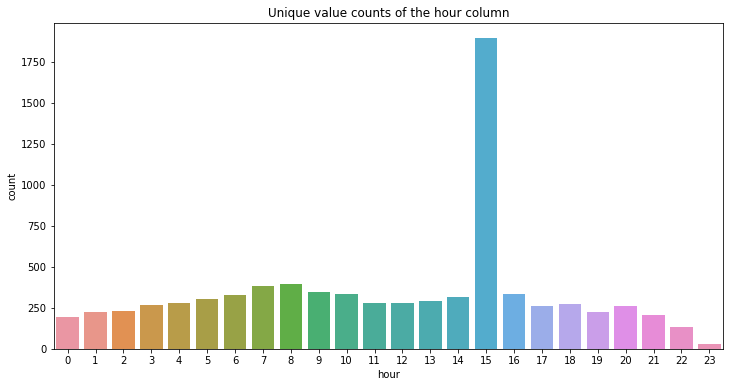

In [10]:
plot(df,'hour','Unique value counts of the hour column')

Hour 15 was the most busiest as the visitors traffic was very high almost 3 times the average of the rest hours.

In [11]:
df['device_make'].value_counts()

Generic Smartphone     4743
iPhone                  433
Samsung SM-G960F        203
Samsung SM-G973F        154
Samsung SM-G950F        148
                       ... 
Samsung SM-A505F          1
D5803                     1
Samsung SM-G6100          1
HTC M10h                  1
XiaoMi Redmi Note 5       1
Name: device_make, Length: 270, dtype: int64

Generic Smartphone was the widely used device.

In [24]:
df['platform_os'].value_counts()

6    7648
5     428
7       1
Name: platform_os, dtype: int64

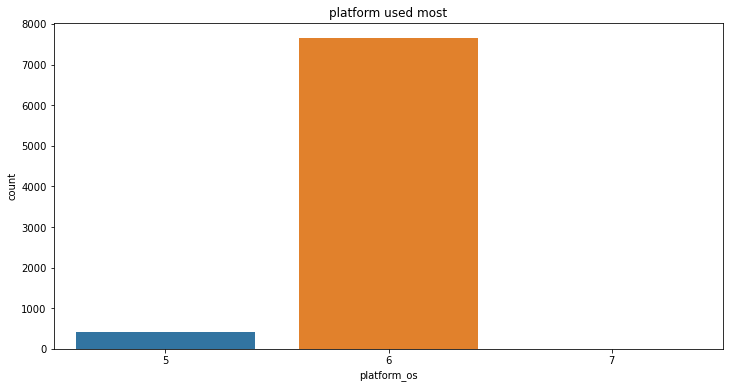

In [25]:
plot(df,'platform_os','platform used most')

Platform number 6 was the most preferred by the test subjects.

In [14]:
df['browser'].value_counts()

Chrome Mobile                 4554
Chrome Mobile WebView         1489
Samsung Internet               824
Facebook                       764
Mobile Safari                  337
Chrome Mobile iOS               51
Mobile Safari UI/WKWebView      44
Chrome                           3
Pinterest                        3
Opera Mobile                     3
Opera Mini                       1
Edge Mobile                      1
Android                          1
Firefox Mobile                   1
Puffin                           1
Name: browser, dtype: int64

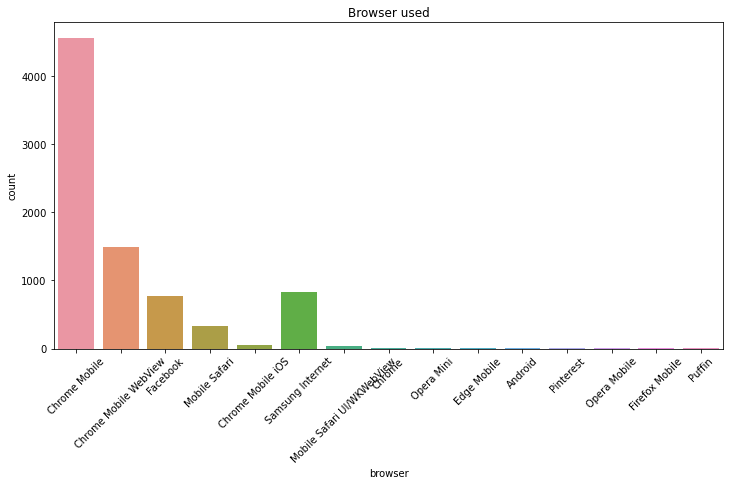

In [15]:
plot(df,"browser",'Browser used',45)


Chrome is the most used browser

In [16]:
df['no'].value_counts()

0    7406
1     671
Name: no, dtype: int64

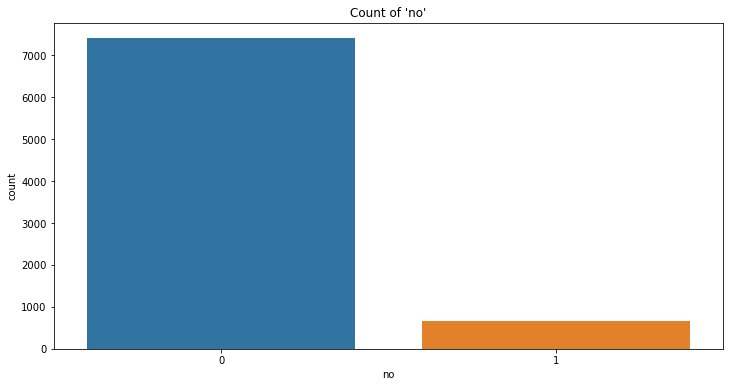

In [28]:
plot(df,"no", "Count of 'no'")

Seems like a majority did not make a selection as compared to the small number who did

In [17]:
df['day'].value_counts()

Friday       2908
Thursday     1208
Wednesday    1198
Saturday      903
Sunday        890
Monday        490
Tuesday       480
Name: day, dtype: int64

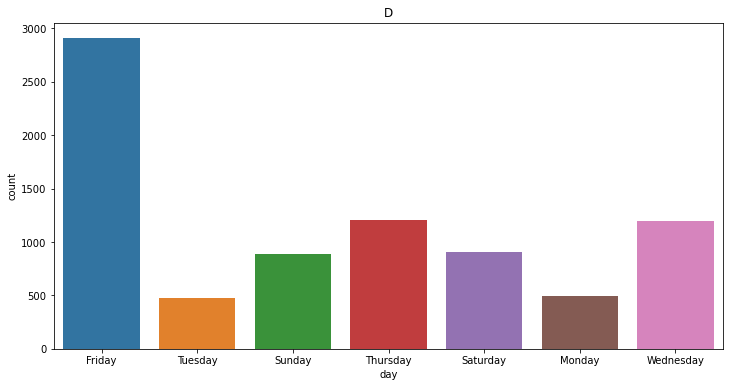

In [18]:
plot(df,'day','D')

Most people used accessed the ads on Friday

# Bivariate Analysis


In [30]:
# Plot function
def bi_plot(df:pd.DataFrame, x_col:str, y_col:str, title:str, rotation=0):
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=x_col , hue = y_col)
    plt.title(title)
    plt.xticks(rotation=rotation)
    plt.show()
    

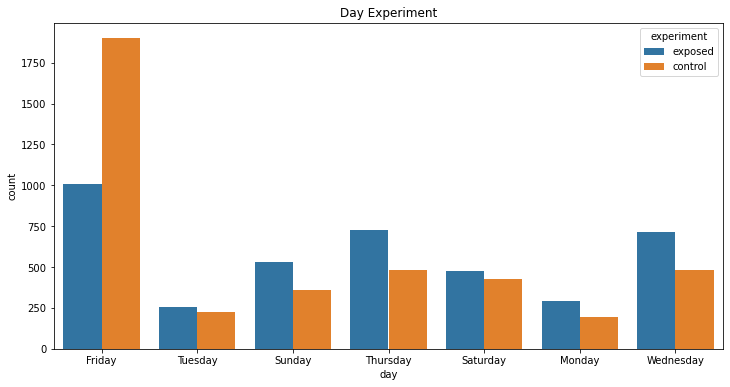

In [35]:
bi_plot(df,'day','experiment','Day Experiment')

From this graph we see that on all days except Friday, the exposed group reported the highest numbers. And Friday recorded the highest number of people engaging their devices.

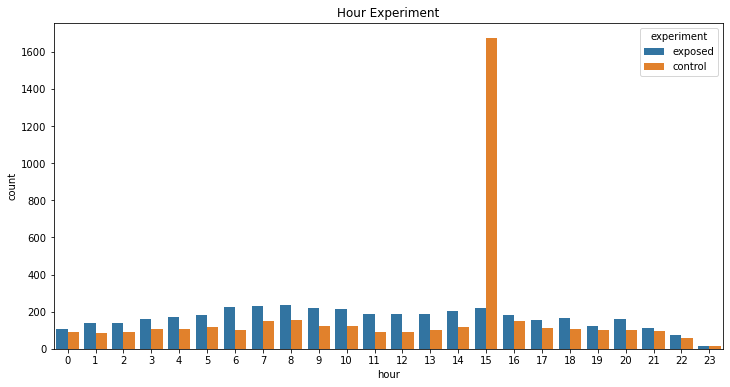

In [31]:
bi_plot(df,'hour','experiment','Hour Experiment')

From this graph we see that in hour 15 the control group reported the highest number of users.

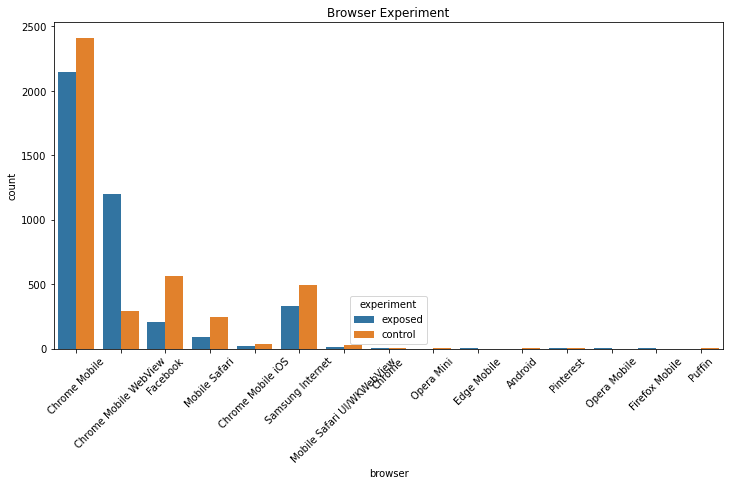

In [ ]:
bi_plot(df,'browser','experiment','Browser Experiment',rotation=45)

From this graph we can deduce that Chrome browsers reported the highest figured with the control group surpassing the exposed group.

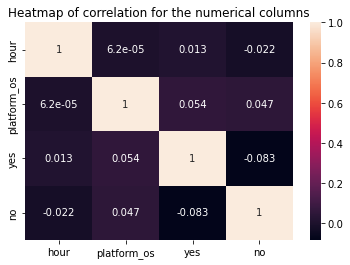

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.title('Heatmap of correlation for the numerical columns')
plt.show()